In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [12]:
R = np.array([
    [-1., 1],
    [0, 0],
    [1, 1],
])

In [5]:
springs = [(0,1), (1, 2)]

In [4]:
N, k = R.shape

In [10]:
H = np.zeros((N,k,N,k))

for i, (start_,stop_) in enumerate(springs):
    v = (R[stop_]-R[start_]).reshape(-1,1)
    for start, stop in [(start_,stop_),(stop_,start_)]:
        H[start,:,start,:] += v@v.T*np.sign(v[0,0])
        H[stop,:,start,:] += -v@v.T*np.sign(v[0,0])

H = H.reshape(N*k,N*k)

In [11]:
H.round(3)

array([[ 1., -1., -1.,  1.,  0.,  0.],
       [-1.,  1.,  1., -1.,  0.,  0.],
       [-1.,  1.,  2.,  0., -1., -1.],
       [ 1., -1.,  0.,  2., -1., -1.],
       [ 0.,  0., -1., -1.,  1.,  1.],
       [ 0.,  0., -1., -1.,  1.,  1.]])

In [13]:
R = np.array([
    [-1., 0],
    [0, 0],
    [1, 0],
])

In [14]:
springs = [(0,1), (1, 2)]

In [15]:
N, k = R.shape

In [16]:
H = np.zeros((N,k,N,k))

for i, (start_,stop_) in enumerate(springs):
    v = (R[stop_]-R[start_]).reshape(-1,1)
    for start, stop in [(start_,stop_),(stop_,start_)]:
        H[start,:,start,:] += v@v.T*np.sign(v[0,0])
        H[stop,:,start,:] += -v@v.T*np.sign(v[0,0])

H = H.reshape(N*k,N*k)

In [17]:
H.round(3)

array([[ 1.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  2.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [24]:
R = np.array([
    [0.,1],
    [0, 0],
    [0, 1],
])

In [25]:
springs = [(0,1), (1, 2)]

In [26]:
N, k = R.shape

In [31]:
H = np.zeros((N,k,N,k))

for i, (start_,stop_) in enumerate(springs):
    v = (R[stop_]-R[start_]).reshape(-1,1)
    for start, stop in [(start_,stop_),(stop_,start_)]:
        s = np.sign(v[0,0])
        if s==0: s = 1
        H[start,:,start,:] += v@v.T*s
        H[stop,:,start,:] += -v@v.T*s

H = H.reshape(N*k,N*k)

In [32]:
H.round(3)

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  2.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  1.]])

In [29]:
v = R[1]-R[0]

In [30]:
np.sign(v[0])

0.0

In [297]:
l, v = np.linalg.eigh(H)

In [298]:
l.round(3)

array([-4., -0., -0., -0.,  0.,  4.])

In [299]:
H @ np.array([1, 1., 0, 0, -1, 1])

array([0., 0., 0., 0., 0., 0.])

In [300]:
H @ np.array([1, 0., 1, 0, 1, 0])

array([0., 0., 0., 0., 0., 0.])

In [301]:
H @ np.array([0., 1, 0, 1, 0, 1])

array([0., 0., 0., 0., 0., 0.])

In [302]:
%run ../plotting.ipynb

In [303]:
%run ../calculating.ipynb

In [304]:
D = zeroModes2d(R, inertiaAxes2d(R[:,0],R[:,1]))

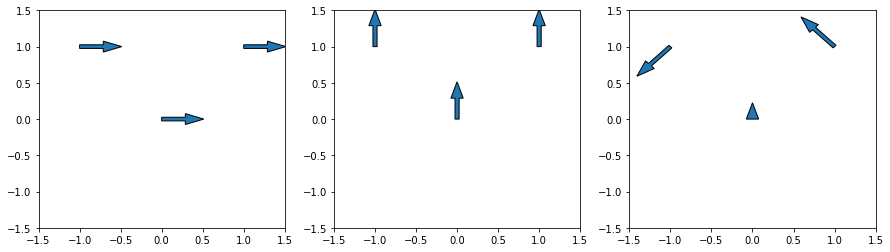

In [305]:
plot(R, D)

In [306]:
inertiaAxes2d(R[:,0],R[:,1]).round(4)

array([[ 2., -0.],
       [-0.,  2.]])

In [307]:
D.round(3)

array([[ 0.577,  0.   ,  0.577,  0.   ,  0.577,  0.   ],
       [ 0.   ,  0.577,  0.   ,  0.577,  0.   ,  0.577],
       [-0.5  , -0.5  , -0.   ,  0.   , -0.5  ,  0.5  ]])

In [308]:
D[2,2] = 1
D[2] /= np.linalg.norm(D[2])

In [310]:
D.round(3)

array([[ 0.577,  0.   ,  0.577,  0.   ,  0.577,  0.   ],
       [ 0.   ,  0.577,  0.   ,  0.577,  0.   ,  0.577],
       [-0.354, -0.354,  0.707,  0.   , -0.354,  0.354]])

In [311]:
l, v = l[l>-1e-3], v[l>-1e-3]

In [312]:
v = np.array([
    np.ones(6),
    np.ones(6)*.5,
    [-1, -1, 0, 0, 1, -1],
])

In [313]:
D.round(4)

array([[ 0.5774,  0.    ,  0.5774,  0.    ,  0.5774,  0.    ],
       [ 0.    ,  0.5774,  0.    ,  0.5774,  0.    ,  0.5774],
       [-0.3536, -0.3536,  0.7071,  0.    , -0.3536,  0.3536]])

In [314]:
for i in range(len(v)):
    tmp = v[i]
    for j in range(len(D)):
        print(i, D[j]@tmp)
        tmp -= D[j]*(D[j]@tmp)
    norm = np.linalg.norm(tmp)
    print(norm)
    if norm>1e-8: continue
    D = np.append(D, (tmp/norm)[np.newaxis,:], 0)

0 1.7320508075688776
0 1.7320508075688776
0 0.0
5.438959822042073e-16
1 0.8660254037844388
1 0.8660254037844388
1 0.0
1 2.719479911021037e-16
6.038458424442253e-32
2 0.0
2 -1.1547005383792517
2 5.2834386112946424e-18
2 -2.220446049250313e-16
2 -5.551115123125783e-17
1.632993161855452


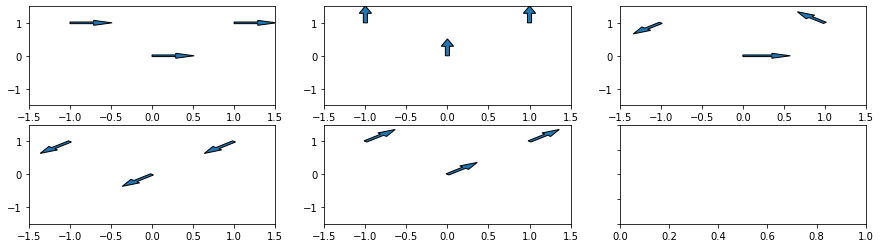

In [315]:
plot(R, D)

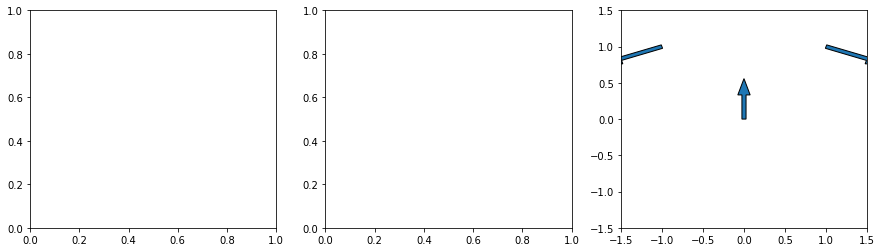

In [316]:
plot(R, v)

In [318]:
v.round(3)

array([[-0.   , -0.   , -0.   , -0.   , -0.   , -0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [-1.   , -0.333, -0.   ,  0.667,  1.   , -0.333]])